<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Network%20in%20Tensorflow/Introduction_to_computer_vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car infront.


## Get the data

The images we are working with are from Food101 dataset (101 different classes of food)

However we have modified it to only use two classes (pizza and steak) using the image data modification notebook.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downlaoded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-17 15:34:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  46.5MB/s    in 2.2s    

2021-11-17 15:34:37 (46.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

Visualizing the samples of the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


## Visualizing the images

To visualize our images, firts let's get the class names programatically

In [6]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

# Create a list of class names from the subdirectories 
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:] # Remove .DS_Store
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape {img.shape}") # Show the shape of the image

  return img

['1147047.jpg']
Image shape (512, 512, 3)


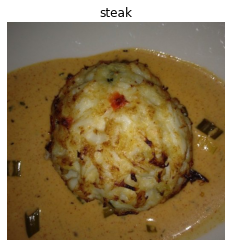

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", 
                        target_class="steak")

In [9]:
img

array([[[ 88,  85,  78],
        [ 88,  85,  78],
        [ 88,  85,  78],
        ...,
        [107, 103, 100],
        [106, 102,  99],
        [107, 103, 100]],

       [[ 87,  84,  77],
        [ 87,  84,  77],
        [ 88,  85,  78],
        ...,
        [105, 101,  98],
        [105, 101,  98],
        [108, 104, 101]],

       [[ 87,  84,  77],
        [ 87,  84,  77],
        [ 88,  85,  78],
        ...,
        [106, 102,  99],
        [107, 103, 100],
        [111, 107, 104]],

       ...,

       [[ 84,  51,  18],
        [ 83,  50,  17],
        [ 81,  48,  15],
        ...,
        [120, 115, 109],
        [120, 115, 109],
        [121, 116, 110]],

       [[ 83,  50,  17],
        [ 83,  50,  17],
        [ 82,  49,  16],
        ...,
        [120, 115, 109],
        [119, 114, 108],
        [119, 114, 108]],

       [[ 82,  49,  16],
        [ 82,  49,  16],
        [ 82,  49,  16],
        ...,
        [119, 114, 108],
        [118, 113, 107],
        [117, 112, 106]]

In [10]:
img.dtype

dtype('uint8')

In [11]:
# Another way to find how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [12]:
# Convert the images to tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 88,  85,  78],
        [ 88,  85,  78],
        [ 88,  85,  78],
        ...,
        [107, 103, 100],
        [106, 102,  99],
        [107, 103, 100]],

       [[ 87,  84,  77],
        [ 87,  84,  77],
        [ 88,  85,  78],
        ...,
        [105, 101,  98],
        [105, 101,  98],
        [108, 104, 101]],

       [[ 87,  84,  77],
        [ 87,  84,  77],
        [ 88,  85,  78],
        ...,
        [106, 102,  99],
        [107, 103, 100],
        [111, 107, 104]],

       ...,

       [[ 84,  51,  18],
        [ 83,  50,  17],
        [ 81,  48,  15],
        ...,
        [120, 115, 109],
        [120, 115, 109],
        [121, 116, 110]],

       [[ 83,  50,  17],
        [ 83,  50,  17],
        [ 82,  49,  16],
        ...,
        [120, 115, 109],
        [119, 114, 108],
        [119, 114, 108]],

       [[ 82,  49,  16],
        [ 82,  49,  16],
        [ 82,  49,  16],
        ...,
        [119, 114, 10

In [13]:
# Viw image shape
img.shape # Returns width, height and color channels

(512, 512, 3)

* Load our images
* Preprocess the images
* Build a CNN to find the patterns in our image
* Compile our CNN
* Fit the CNN to our training data

## Feature Scaling of the data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess the data 

train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Build a CNN

In [15]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

# 1. Create the model
model = tf.keras.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation=tf.keras.activations.relu,
                        input_shape=(224,224,3)),
 tf.keras.layers.Conv2D(10, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2,
                           padding="valid"),
 tf.keras.layers.Conv2D(10,3,activation="relu"),
 tf.keras.layers.Conv2D(10, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                           
])

# 2. Compile the CNN model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 43s 252ms/step - loss: 0.6065 - accuracy: 0.6760 - val_loss: 0.4496 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4337 - accuracy: 0.8080 - val_loss: 0.3288 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4177 - accuracy: 0.8080 - val_loss: 0.3347 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3595 - accuracy: 0.8460 - val_loss: 0.3275 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3057 - accuracy: 0.8720 - val_loss: 0.2682 - val_accuracy: 0.8920


In [16]:
# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before without Conv 2-D

Let's replicate the model we've built in a previous section to see if it works with our image data. 

The model we are building is from the [Tensorflow playground](  https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.04992&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
)

Accuracy looking too poor !!!!!!!

In [17]:
# Set some random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(224,224,3)),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)                               
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 1.0300 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


## Binary Classification: Let's break it down

1. Become one with the data (visualize)
2. Preprocess the data(prepare it for our model, the main step here was scaling/normalization)
3.Create a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with the data(visualize)

['534633.jpg']
Image shape (499, 512, 3)
['2361973.jpg']
Image shape (384, 512, 3)


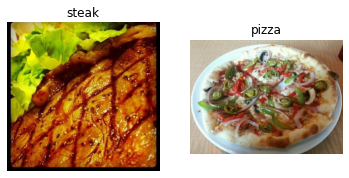

In [18]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocessing the data(prepare it for the model)

In [19]:
# Define the directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

### Our next step is to turn data into **batches**(Subset of the big data)

In [20]:
!nvidia-smi

Wed Nov 17 15:37:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    73W / 149W |   1304MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
# Create the train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32) #size od minin batches

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in the dataset
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there ?
len(train_data)

47

In [25]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.95294124, 0.9450981 , 0.9490197 ],
          [0.8235295 , 0.81568635, 0.8196079 ],
          [0.97647065, 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [26]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### Create a CNN model(start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experimenting, you try to beat the baseline.

In [27]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_2 = Sequential([
 Conv2D(filters=10, # filter is the number of sliding windows going across input (higher = more complex model)
        kernel_size=(3,3), # size of the sliding window going across an input 
        strides=(1,1),
        padding="valid",
        activation="relu",
        input_shape=(224,224,3)), # input layer shape
 Conv2D(10,3, activation="relu"),
 Conv2D(10,3, activation="relu"),
 Flatten(),
 Dense(1, activation="sigmoid")]) # output layer shape

In [28]:
# part 16